### Import libs from packages

In [1]:
import pandas as pd
from med.room.processors.class_principal import CallMethods
from med.room.processors.data_views import DataVisualizer
from med.room.processors.transform_data import NedRoomClean
from med.room.utils import logger

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Creating DataFrame

In [3]:
dados = {'indices_id': ['0','1','2','3'],
         'Frase original': ['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?'],
         'Frases comparativas': ['De acordo com a escala de dor ali na parede', 
                                'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?'],
         }

In [4]:
dataset = pd.DataFrame(dados)

In [5]:
dataset

,indices_id,Frase original,Frases comparativas
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?


In [6]:
dataset.shape

(4, 3)

### Save DataSet in Lake

In [7]:
filename = 'dados_frases'
df = NedRoomClean.save_file(dataset, filename)

[03/12 13:28:30] - [Info]:  save csf file
[03/12 13:28:30] - [Info]:  Finishing Process


### Declare Variables

In [8]:
filename = 'dados_frases'
column_text = ['Frase original', 'Frases comparativas']
additional_stop_words = ['bom', 'dia', 'ola', 'eu']
especifc_word_similar = 'dor'
title_of_plot_first = 'Similar words from text'
list_of_relationship_positive = ["acordo", "melhor"]
list_of_relationship_negative = ['dor', 'intensidade']

#target_sentence = "You'd love to drink a cool refreshing Coke"
target_sentence = ["Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",
                  "De acordo com a escala de dor ali na parede",
                  'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?']

### Building Process

In [9]:
dataset, model_similar, matrix_words, dataframe_matrix, model, embeddings_en_2d, print_info, similar, word_clusters, w2v_vocab_result, result = CallMethods.call_processors(filename=filename,
                                                                                column_text=column_text,
                                                                                additional_stop_words=additional_stop_words,
                                                                                especifc_word_similar=especifc_word_similar,
                                                                                list_of_relationship_positive=list_of_relationship_positive,
                                                                                list_of_relationship_negative=list_of_relationship_negative,
                                                                                target_sentence=target_sentence)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc00cec29d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[03/12 13:28:36] - [Info]:  Start Process to Similary Words
[03/12 13:28:36] - [Info]:  Load DataFrame
[03/12 13:28:36] - [Info]:  load csf file
[03/12 13:28:36] - [Info]:  Finishing Process
[03/12 13:28:36] - [Debug]:  Numbers of columns and Rows (4, 3)
[03/12 13:28:36] - [Debug]:  Columns Name Index(['indices_id', 'Frase original', 'Frases comparativas'], dtype='object')
[03/12 13:28:36] - [Info]:  Start Process to Transform Data
[03/12 13:28:36] - [Debug]:  column created: 
 0    olhando escala parede valor indicaria melhor dor hoje
1    olhando escala parede valor indicaria melhor dor hoje
2    olhando escala parede valor indicaria melhor dor hoje
3    olhando escala parede valor indicaria melhor dor hoje
Name: Frase original_clean, dtype: object
[03/12 13:28:36] - [Debug]:  column created: 
 0        acordo escala dor ali parede
1      valor voce acha representa dor
2    nivel intensidade dor atualmente
3                     intensidade dor
Name: Frases comparativas_clean, dtype: 

### Visualize Results

In [10]:
# dataframe construido
dataset

,indices_id,Frase original,Frases comparativas,Frase original_clean,Frases comparativas_clean,Frase original_token,Frases comparativas_token,concatenado
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede,olhando escala parede valor indicaria melhor dor hoje,acordo escala dor ali parede,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[acordo, escala, dor, ali, parede]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, acordo, escala, dor, ali, parede]"
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?,olhando escala parede valor indicaria melhor dor hoje,valor voce acha representa dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[valor, voce, acha, representa, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, valor, voce, acha, representa, dor]"
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?",olhando escala parede valor indicaria melhor dor hoje,nivel intensidade dor atualmente,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[nivel, intensidade, dor, atualmente]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, nivel, intensidade, dor, atualmente]"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?,olhando escala parede valor indicaria melhor dor hoje,intensidade dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[intensidade, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, intensidade, dor]"


In [11]:
# lista de palavras de todo dataset
matrix_words

['olhando',
 'escala',
 'parede',
 'valor',
 'indicaria',
 'melhor',
 'dor',
 'hoje',
 'acordo',
 'ali',
 'voce',
 'acha',
 'representa',
 'nivel',
 'intensidade',
 'atualmente']

In [12]:
# matrix de score entre todas as palavras cruzadas do dataset
dataframe_matrix

,olhando,escala,parede,valor,indicaria,melhor,dor,hoje,acordo,ali,voce,acha,representa,nivel,intensidade,atualmente
olhando,1.000000,0.185257,-0.139488,-0.069224,0.128735,-0.052453,0.011244,0.075227,0.026325,0.053379,-0.115399,-0.138589,-0.054224,-0.022167,-0.051760,-0.096339
escala,0.185257,1.000000,-0.037032,0.069525,0.058605,-0.027683,-0.099915,0.196009,0.043581,-0.232917,-0.030457,-0.084695,0.012192,-0.106575,-0.030609,-0.003379
parede,-0.139488,-0.037032,1.000000,-0.102467,0.053113,-0.019311,-0.036517,-0.039622,0.062735,0.032673,-0.027299,-0.159890,-0.310862,-0.039871,0.030601,0.050668
valor,-0.069224,0.069525,-0.102467,1.000000,0.010906,0.141230,0.077864,-0.218988,0.033303,-0.050850,0.161059,-0.039166,0.137126,-0.167501,-0.060952,0.120657
indicaria,0.128735,0.058605,0.053113,0.010906,1.000000,-0.094506,-0.104396,-0.022262,-0.054849,0.103556,0.195804,-0.198094,-0.061970,-0.121335,-0.018023,-0.073641
melhor,-0.052453,-0.027683,-0.019311,0.141230,-0.094506,1.000000,0.175972,-0.089404,0.076483,-0.038409,0.037462,-0.027193,-0.058470,0.010820,-0.022984,0.065366
dor,0.011244,-0.099915,-0.036517,0.077864,-0.104396,0.175972,1.000000,-0.034576,0.028269,-0.188395,-0.058677,0.052866,0.142349,0.037144,-0.003628,0.010756
hoje,0.075227,0.196009,-0.039622,-0.218988,-0.022262,-0.089404,-0.034576,1.000000,0.131587,-0.013880,-0.153482,0.046139,-0.082500,-0.004220,0.011894,-0.011279
acordo,0.026325,0.043581,0.062735,0.033303,-0.054849,0.076483,0.028269,0.131587,1.000000,0.007386,0.099334,-0.044060,0.041246,0.148060,-0.048387,0.134034
ali,0.053379,-0.232917,0.032673,-0.050850,0.103556,-0.038409,-0.188395,-0.013880,0.007386,1.000000,-0.169338,-0.111911,-0.036821,-0.059994,-0.053792,0.005229


In [13]:
# modelo word2Vec treinado
model

In [14]:
# matrix construida a partir da lista de palavras matrix_words que é todo o contexto do dataset
embeddings_en_2d

array([[[-1112.9816   ,   233.30441  ],
        [  114.11438  ,  1184.7681   ],
        [ 1181.2097   ,  -128.17513  ],
        [  852.30066  ,  3074.7415   ],
        [  -68.69075  ,   338.7428   ],
        [-1818.8062   , -1649.0631   ],
        [ 1742.2307   , -1814.6024   ],
        [ -361.53177  ,  -992.7826   ],
        [-2112.473    ,  -351.48212  ],
        [-2307.533    ,   984.98083  ],
        [-1223.0713   ,  1891.9376   ],
        [  448.05133  , -1687.3195   ],
        [    5.5579634,  2343.3132   ],
        [ -587.5404   , -2411.0618   ],
        [ 1873.528    ,   769.983    ]],

       [[ 1119.5614   ,  -514.4301   ],
        [ 2458.095    ,  -440.58206  ],
        [-1223.0713   ,  1891.9376   ],
        [  499.25186  ,  1110.5375   ],
        [  100.444756 ,    -7.734333 ],
        [-2307.533    ,   984.98083  ],
        [  448.05133  , -1687.3195   ],
        [-2112.473    ,  -351.48212  ],
        [    5.5579634,  2343.3132   ],
        [ -725.6206   ,  -854.4199   ]

In [15]:
#relacionamento de palavras positivas e negativas a partir da variavel: 
# list_of_relationship_positive e list_of_relationship_negative
print_info

[('atualmente', 0.12431934475898743),
 ('ali', 0.1072024255990982),
 ('valor', 0.08002065122127533),
 ('voce', 0.07707158476114273),
 ('escala', 0.07433492690324783),
 ('hoje', 0.032930515706539154),
 ('parede', 0.025048311799764633),
 ('olhando', 0.007303759455680847),
 ('nivel', -0.0018426626920700073),
 ('acha', -0.0026074275374412537)]

In [16]:
# lista de palavras relacionada a variavel especifc_word_similar + score das palavras (pode ser qualquer outra que tenha no vocabulario)
similar

[('melhor', 0.18),
 ('representa', 0.14),
 ('valor', 0.08),
 ('acha', 0.05),
 ('nivel', 0.04),
 ('acordo', 0.03),
 ('olhando', 0.01),
 ('atualmente', 0.01),
 ('intensidade', -0.0),
 ('hoje', -0.03)]

In [17]:
# mapa de palavras similares para construcao do plot grafico
word_clusters

[['escala',
  'indicaria',
  'hoje',
  'ali',
  'acordo',
  'dor',
  'nivel',
  'intensidade',
  'melhor',
  'representa',
  'valor',
  'atualmente',
  'voce',
  'acha',
  'parede'],
 ['hoje',
  'olhando',
  'valor',
  'indicaria',
  'acordo',
  'representa',
  'atualmente',
  'melhor',
  'voce',
  'intensidade',
  'parede',
  'acha',
  'dor',
  'nivel',
  'ali'],
 ['acordo',
  'indicaria',
  'atualmente',
  'ali',
  'intensidade',
  'melhor',
  'voce',
  'dor',
  'escala',
  'hoje',
  'nivel',
  'valor',
  'olhando',
  'acha',
  'representa'],
 ['voce',
  'melhor',
  'representa',
  'atualmente',
  'dor',
  'escala',
  'acordo',
  'indicaria',
  'acha',
  'ali',
  'intensidade',
  'olhando',
  'parede',
  'nivel',
  'hoje'],
 ['voce',
  'olhando',
  'ali',
  'escala',
  'parede',
  'valor',
  'intensidade',
  'hoje',
  'acordo',
  'representa',
  'atualmente',
  'melhor',
  'dor',
  'nivel',
  'acha'],
 ['dor',
  'valor',
  'acordo',
  'atualmente',
  'voce',
  'nivel',
  'parede',
  

In [18]:
w2v_vocab_result

['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
 'De acordo com a escala de dor ali na parede',
 'qual valor você acha que mais representa a sua dor?',
 'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
 'Qual a intensidade da sua dor?']

In [19]:
result

[(0.9999999403953552, 'intensidade'),
 (0.12536564469337463, 'nivel'),
 (0.04366037994623184, 'voce'),
 (0.03060101717710495, 'parede'),
 (0.011893939226865768, 'hoje'),
 (-0.0036284285597503185, 'dor'),
 (-0.01802302710711956, 'indicaria'),
 (-0.02298395335674286, 'melhor'),
 (-0.03060908615589142, 'escala'),
 (-0.0483868233859539, 'acordo'),
 (-0.05175962299108505, 'olhando'),
 (-0.05379152670502663, 'ali'),
 (-0.05623522028326988, 'atualmente'),
 (-0.06095198914408684, 'valor'),
 (-0.08885250240564346, 'representa'),
 (-0.11898292601108551, 'acha')]

### Plot Graph Views

### plot de mapa de palavras e suas similariedades

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

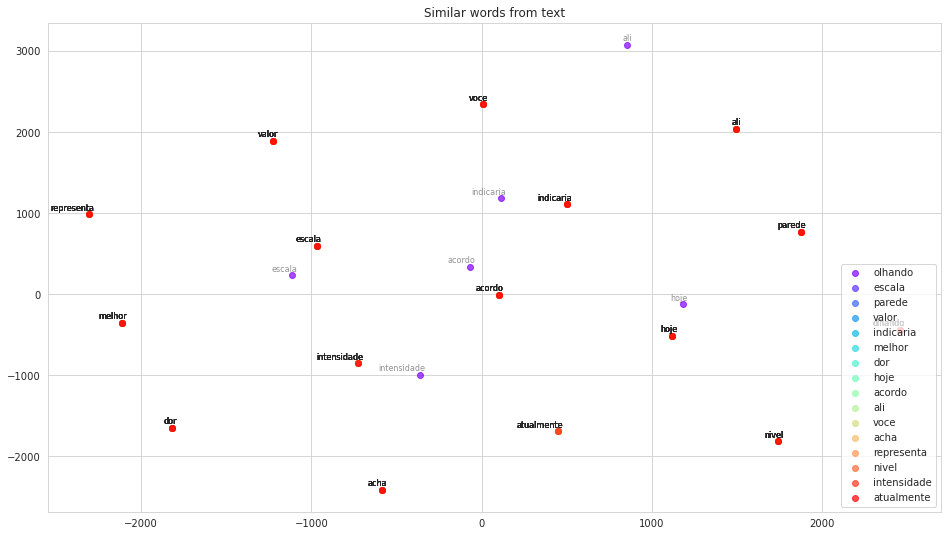

In [20]:
DataVisualizer.tsne_plot_similar_words(title_of_plot_first, matrix_words, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

### Mapa de palavras e seu grau de relacionamento

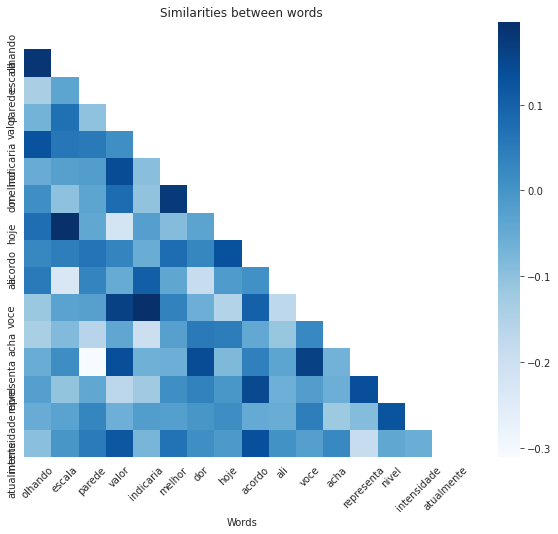

In [21]:
DataVisualizer.plo_similar_between_words(dataframe_matrix)

### Mapa dimensional de palavras similares

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc050328f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/opt/med_room/med/room/processors/data_views.py:100: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the

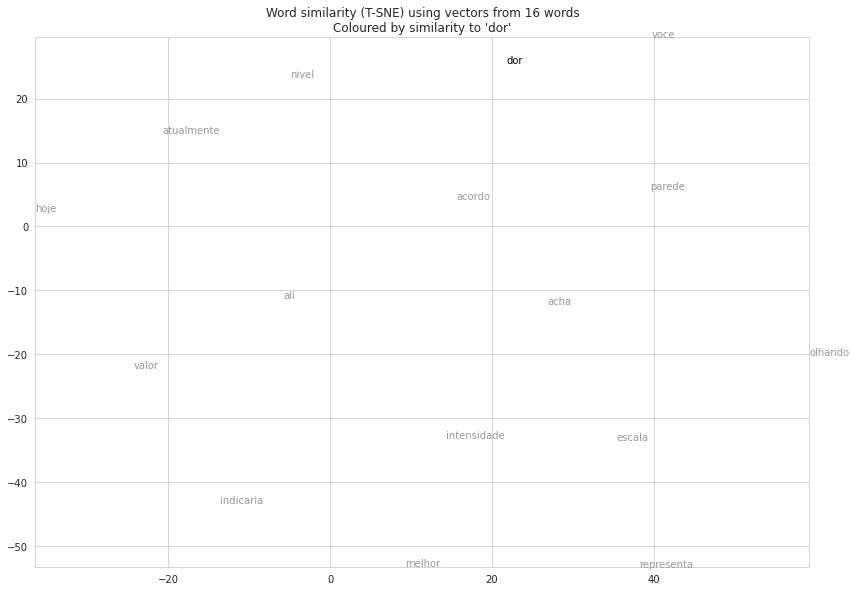

In [22]:
DataVisualizer.dimensional_vector_words(model, matrix_words, especifc_word_similar)